In [1]:
import numpy as np
from scipy import linalg
from scipy import optimize
from scipy import interpolate

import sympy as sm
%matplotlib inline
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D


# 1. Human capital accumulation

Consider a worker living in **two periods**, $t \in \{1,2\}$. 

In each period she decides whether to **work ($l_t = 1$) or not ($l_t = 0$)**. 

She can *not* borrow or save and thus **consumes all of her income** in each period. 

If she **works** her **consumption** becomes:

$$c_t = w h_t l_t\,\,\text{if}\,\,l_t=1$$

where $w$ is **the wage rate** and $h_t$ is her **human capital**. 

If she does **not work** her consumption becomes:

$$c_t = b\,\,\text{if}\,\,l_t=0$$

where $b$ is the **unemployment benefits**.

Her **utility of consumption** is: 

$$ \frac{c_t^{1-\rho}}{1-\rho} $$

Her **disutility of working** is:

$$ \gamma l_t $$

From period 1 to period 2, she **accumulates human capital** according to:

$$ h_2 = h_1 + l_1 + 
\begin{cases}
0 & \text{with prob. }0.5 \\
\Delta & \text{with prob. }0.5 
\end{cases} \\
$$

where $\Delta$ is a **stochastic experience gain**.

In the **second period** the worker thus solves:

$$
\begin{eqnarray*}
v_{2}(h_{2}) & = &\max_{l_{2}} \frac{c_2^{1-\rho}}{1-\rho} - \gamma l_2
\\ & \text{s.t.} & \\
c_{2}& = & w h_2 l_2 \\
l_{2}& \in &\{0,1\}
\end{eqnarray*}
$$

In the **first period** the worker thus solves:

$$
\begin{eqnarray*}
v_{1}(h_{1}) &=& \max_{l_{1}} \frac{c_1^{1-\rho}}{1-\rho} - \gamma l_1 + \beta\mathbb{E}_{1}\left[v_2(h_2)\right]
\\ & \text{s.t.} & \\
c_1 &=& w h_1 l_1 \\
h_2 &=& h_1 + l_1 + \begin{cases}
0 & \text{with prob. }0.5\\
\Delta & \text{with prob. }0.5 
\end{cases}\\
l_{1} &\in& \{0,1\}\\
\end{eqnarray*}
$$

where $\beta$ is the **discount factor** and $\mathbb{E}_{1}\left[v_2(h_2)\right]$ is the **expected value of living in period two**.

The **parameters** of the model are:

In [2]:
rho = 2
beta = 0.96
gamma = 0.1
w = 2
b = 1
Delta = 0.1

The **relevant levels of human capital** are:

In [3]:
h_vec = np.linspace(0.1,1.5,100) 

**Question 1:** Solve the model in period 2 and illustrate the solution (including labor supply as a function of human capital). 

**Question 2:** Solve the model in period 1 and illustrate the solution (including labor supply as a function of human capital). 

**Question 3:** Will the worker never work if her potential wage income is lower than the unemployment benefits she can get? Explain and illustrate why or why not.

# Question 1: Solve the model in period 2 and illustrate the solution (including labor supply as a function of human capital).

In line with problemset 7 and lecture 10:
    1. basic functions
    2. solution functions
    3. graphs

In [4]:
def c(w,h,l,b):
    return w*h*l + b*(1-l)

def utility(w,h,l,b,rho):
    return c(w,h,l,b)**(1-rho)/(1-rho)

def disutility(gamma,l):
    return gamma*l

def v2(w,h2,l2,b,rho,gamma):
    return utility(w,h2,l2,b,rho)-disutility(gamma,l2)

Parameters

In [5]:
rho = 2
beta = 0.96
gamma = 0.1
w = 2
b = 1
Delta = 0.1

In [6]:
def solve_period_2(w,b,rho,gamma,Delta):

    # a. grids
    h2_vec = np.linspace(0.1,1.5,100)
    v2_vec = np.empty(100)
    l2_vec = np.empty(100)

    # b. solve for each h2 in grid
    for i,h2 in enumerate(h2_vec):
 
        obj = lambda l2: -1* v2(w,h2,l2,b,rho,gamma)

        # ii. initial value 
        x0 = h2/2

        # iii. optimizer
        result = optimize.minimize_scalar(obj,x0,method='bounded',bounds=[0,1])

        # iv. save
        v2_vec[i] = -result.fun
        l2_vec[i] = result.x
        
    return h2_vec,v2_vec,l2_vec


Text(0.5, 1.0, 'human capital in period 2')

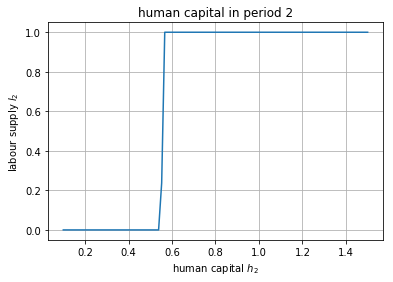

In [7]:
# solve
h2_vec,v2_vec,l2_vec = solve_period_2(w,b,rho,gamma,Delta)
# illustration
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(h2_vec,l2_vec)
ax.grid()
ax.set_xlabel('human capital $h_2$')
ax.set_ylabel('labour supply $l_2$')
ax.set_title('human capital in period 2')



The worker is willing to work at a certain level of human capital. This level is slightly above 0.5. Below she will not work.

Text(0.5, 1.0, 'value of living in period 2')

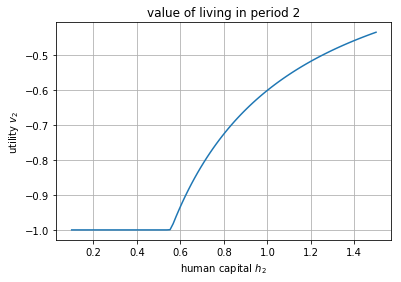

In [8]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(h2_vec,v2_vec)
ax.grid()
ax.set_xlabel('human capital $h_2$')
ax.set_ylabel('utility $v_2$')
ax.set_title('value of living in period 2')


We see that her net utility is decreasing when she gets to a certain level of human capital (approximately 0.5)

# Question 2: Solve the model in period 1 and illustrate the solution (including labor supply as a function of human capital). 

In line with problemset 7 and lecture 10:
    1. basic functions
    2. solution functions
    3. graphs

In [9]:
def c(w,h,l,b):
    return w*h*l + b*(1-l)

def utility(w,h,l,b,rho):
    return c(w,h,l,b)**(1-rho)/(1-rho)

def disutility(gamma,l):
    return gamma*l

def v2(w,h2,l2,b,rho,gamma):
    return utility(w,h2,l2,b,rho)-disutility(gamma,l2)

In [10]:
v2_interp = interpolate.RegularGridInterpolator([h2_vec], v2_vec,
                                                bounds_error=False,fill_value=None)

In [11]:
def v1(w,h1,l1,b,rho,gamma,Delta,beta,v2_interp):
    
    # a. v2 value, if low h2
    h2_low = h1 + l1 + 0
    v2_low = v2_interp([h2_low])[0]
    
    # a. v2 value, if high h2
    h2_high = h1 + l1 + Delta
    v2_high = v2_interp([h2_high])[0]
    
    # c. expected v2 value
    v2 = 0.5*v2_low + 0.5*v2_high
    
    # d. total value
    return utility(w,h1,l1,b,rho)-disutility(gamma,l1) + beta*v2

Parameters

In [12]:
rho = 2
beta = 0.96
gamma = 0.1
w = 2
b = 1
Delta = 0.1

In [13]:
def solve_period_1(w,b,rho,beta,Delta,gamma,v2_interp):

    # a. grids
    h1_vec = np.linspace(0.1,1.5,100) 
    v1_vec = np.empty(100)
    l1_vec = np.empty(100)
    
    # b. solve for each m1 in grid
    for i,h1 in enumerate(h1_vec):
        
      
        obj = lambda l1: -1*v1(w,h1,l1,b,rho,gamma,Delta,beta,v2_interp)
        
        # ii. initial guess (consume half)
        x0 = h1/2
        
        # iii. optimize
        result = optimize.minimize_scalar(obj,x0,method='bounded',bounds=[0,1])
        
        # iv. save
        v1_vec[i] = -result.fun
        l1_vec[i] = result.x
     
    return h1_vec,v1_vec,l1_vec

Text(0.5, 1.0, 'human capital in period 1')

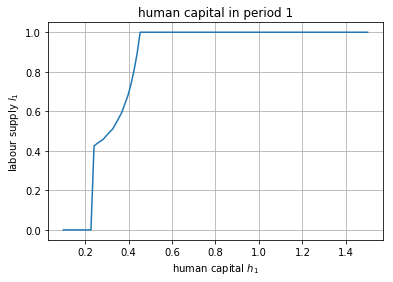

In [14]:
# solve
h1_vec,v1_vec,l1_vec = solve_period_1(w,b,rho,beta,Delta,gamma,v2_interp)

# illustrat
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(h1_vec,l1_vec)
ax.grid()
ax.set_xlabel('human capital $h_1$')
ax.set_ylabel('labour supply $l_1$')
ax.set_title('human capital in period 1')


In period 1 the worker is willing to work at a level of human capital which is above 0.2. At a certain piont of human capital the labour supply increases slower. 

There might be an mistake in the code. But we did it in line to question 1.

Text(0.5, 1.0, 'value of living in period 1')

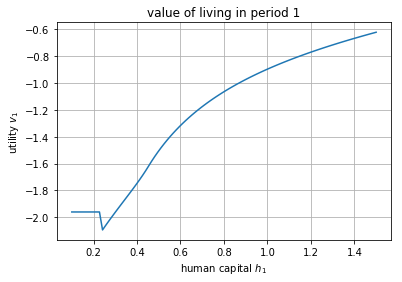

In [15]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(h1_vec,v1_vec)
ax.grid()
ax.set_xlabel('human capital $h_1$')
ax.set_ylabel('utility $v_1$')
ax.set_title('value of living in period 1')


We see that her net utility is increases when she gets to a certain level of human capital (approximately 0.3). But before she reaches that piont her utility decreases at level of approximately 0.25 of human capital.


# Question 3: Will the worker never work if her potential wage income is lower than the unemployment benefits she can get? Explain and illustrate why or why not.

We plot human capital and the value of living in both period, for different wages
1. w = 2
2. w = 0.9
3. w = 0.8
4. w = 0.5

**Period 2: Human Capital**

C:\Users\BKirs\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0.5, 1.0, 'human capital in period 2')

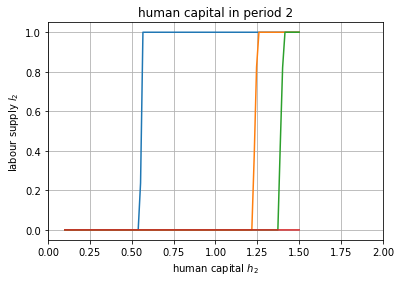

In [16]:
h2_vec,v2_vec,l2_vec = solve_period_2(w,b,rho,gamma,Delta)

h2_vec1,v2_vec1,l2_vec1 = solve_period_2(0.9,b,rho,gamma,Delta)
h2_vec2,v2_vec2,l2_vec2 = solve_period_2(0.8,b,rho,gamma,Delta)
h2_vec3,v2_vec3,l2_vec3 = solve_period_2(0.5,b,rho,gamma,Delta)

# illustration
fig = plt.figure()
plt.xlim(0,2)
ax = fig.add_subplot(1,1,1)
ax.plot(h2_vec,l2_vec)
ax.plot(h2_vec1,l2_vec1)
ax.plot(h2_vec2,l2_vec2)
ax.plot(h2_vec3,l2_vec3)
ax.grid()
ax.set_xlabel('human capital $h_2$')
ax.set_ylabel('labour supply $l_2$')
ax.set_title('human capital in period 2')

The unemployment benefits(b) are equal to 1. We see in this graph that the worker is also willing to work, if the wage (w) is smaller than b. But if the wage decreases, the level of human capital must increase to compensate the wage in her utility function. 

Text(0.5, 1.0, 'value of living in period 2')

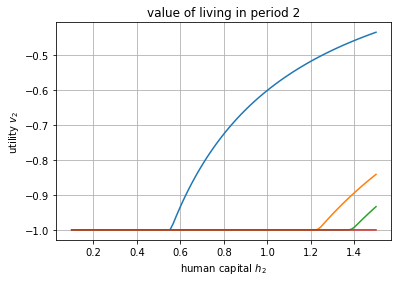

In [17]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(h2_vec,v2_vec)
ax.plot(h2_vec1,v2_vec1)
ax.plot(h2_vec2,v2_vec2)
ax.plot(h2_vec3,v2_vec3)
ax.grid()
ax.set_xlabel('human capital $h_2$')
ax.set_ylabel('utility $v_2$')
ax.set_title('value of living in period 2')

The utility of working still increases, but on higher levels of human capital. But we also see that her utility is negative all the time, maybe she should take some hobbies into account.

**Period 1**

Text(0.5, 1.0, 'human capital in period 1')

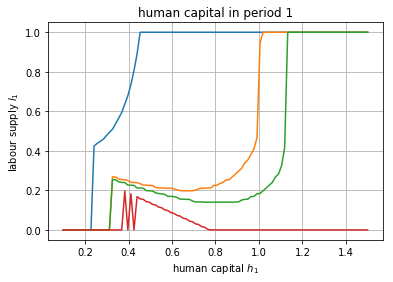

In [18]:
# solve
h1_vec,v1_vec,l1_vec = solve_period_1(w,b,rho,beta,Delta,gamma,v2_interp)

h1_vec1,v1_vec1,l1_vec1 = solve_period_1(0.9,b,rho,beta,Delta,gamma,v2_interp)
h1_vec2,v1_vec2,l1_vec2 = solve_period_1(0.8,b,rho,beta,Delta,gamma,v2_interp)
h1_vec3,v1_vec3,l1_vec3 = solve_period_1(0.5,b,rho,beta,Delta,gamma,v2_interp)

# illustrat
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(h1_vec,l1_vec)
ax.plot(h1_vec1,l1_vec1)
ax.plot(h1_vec2,l1_vec2)
ax.plot(h1_vec3,l1_vec3)
ax.grid()
ax.set_xlabel('human capital $h_1$')
ax.set_ylabel('labour supply $l_1$')
ax.set_title('human capital in period 1')

Text(0.5, 1.0, 'value of living in period 1')

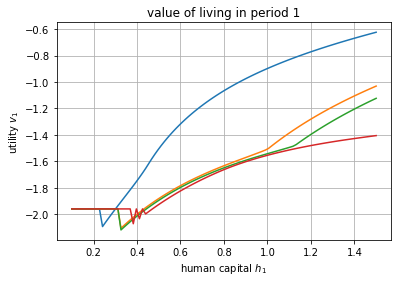

In [19]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(h1_vec,v1_vec)
ax.plot(h1_vec1,v1_vec1)
ax.plot(h1_vec2,v1_vec2)
ax.plot(h1_vec3,v1_vec3)
ax.grid()
ax.set_xlabel('human capital $h_1$')
ax.set_ylabel('utility $v_1$')
ax.set_title('value of living in period 1')


# 2. AS-AD model

Consider the following **AS-AD model**. The **goods market equilibrium** is given by

$$ y_{t} = -\alpha r_{t} + v_{t} $$

where $y_{t}$ is the **output gap**, $r_{t}$ is the **ex ante real interest** and $v_{t}$ is a **demand disturbance**. 

The central bank's **Taylor rule** is

$$ i_{t} = \pi_{t+1}^{e} + h \pi_{t} + b y_{t}$$

where $i_{t}$ is the **nominal interest rate**, $\pi_{t}$ is the **inflation gap**, and $\pi_{t+1}^{e}$ is the **expected inflation gap**. 

The **ex ante real interest rate** is given by 

$$ r_{t} = i_{t} - \pi_{t+1}^{e} $$

Together, the above implies that the **AD-curve** is

$$ \pi_{t} = \frac{1}{h\alpha}\left[v_{t} - (1+b\alpha)y_{t}\right]$$

Further, assume that the **short-run supply curve (SRAS)** is given by

$$ \pi_{t} = \pi_{t}^{e} + \gamma y_{t} + s_{t}$$

where $s_t$ is a **supply disturbance**.

**Inflation expectations are adaptive** and given by

$$ \pi_{t}^{e} = \phi\pi_{t-1}^{e} + (1-\phi)\pi_{t-1}$$

Together, this implies that the **SRAS-curve** can also be written as

$$ \pi_{t} = \pi_{t-1} + \gamma y_{t} - \phi\gamma y_{t-1} + s_{t} - \phi s_{t-1} $$

The **parameters** of the model are:

In [20]:
par = {}

par['alpha'] = 5.76
par['h'] = 0.5
par['b'] = 0.5
par['phi'] = 0
par['gamma'] = 0.075

**Question 1:** Use the ``sympy`` module to solve for the equilibrium values of output, $y_t$, and inflation, $\pi_t$, (where AD = SRAS) given the parameters ($\alpha$, $h$, $b$, $\alpha$, $\gamma$) and $y_{t-1}$ , $\pi_{t-1}$, $v_t$, $s_t$, and $s_{t-1}$.

**Question 2:** Find and illustrate the equilibrium when $y_{t-1} = \pi_{t-1} = v_t = s_t = s_{t-1} = 0$. Illustrate how the equilibrium changes when instead $v_t = 0.1$.

**Persistent disturbances:** Now, additionaly, assume that both the demand and the supply disturbances are AR(1) processes

$$ v_{t} = \delta v_{t-1} + x_{t} $$
$$ s_{t} = \omega s_{t-1} + c_{t} $$

where $x_{t}$ is a **demand shock**, and $c_t$ is a **supply shock**. The **autoregressive parameters** are:

In [21]:
par['delta'] = 0.80
par['omega'] = 0.15

**Question 3:** Starting from $y_{-1} = \pi_{-1} = s_{-1} = 0$, how does the economy evolve for $x_0 = 0.1$, $x_t = 0, \forall t > 0$ and $c_t = 0, \forall t \geq 0$?

**Stochastic shocks:** Now, additionally, assume that $x_t$ and $c_t$ are stochastic and normally distributed

$$ x_{t}\sim\mathcal{N}(0,\sigma_{x}^{2}) $$
$$ c_{t}\sim\mathcal{N}(0,\sigma_{c}^{2}) $$

The **standard deviations of the shocks** are:

In [22]:
par['sigma_x'] = 3.492
par['sigma_c'] = 0.2

**Question 4:** Simulate the AS-AD model for 1,000 periods. Calculate the following five statistics:

1. Variance of $y_t$, $var(y_t)$
2. Variance of $\pi_t$, $var(\pi_t)$
3. Correlation between $y_t$ and $\pi_t$, $corr(y_t,\pi_t)$
4. Auto-correlation between $y_t$ and $y_{t-1}$, $corr(y_t,y_{t-1})$
5. Auto-correlation between $\pi_t$ and $\pi_{t-1}$, $corr(\pi_t,\pi_{t-1})$

**Question 5:** Plot how the correlation between $y_t$ and $\pi_t$ changes with $\phi$. Use a numerical optimizer or root finder to choose $\phi\in(0,1)$ such that the simulated correlation between $y_t$ and $\pi_t$ comes close to 0.31. 

**Quesiton 6:** Use a numerical optimizer to choose $\sigma_x>0$, $\sigma_c>0$ and $\phi\in(0,1)$ to make the simulated statistics as close as possible to US business cycle data where:

1. $var(y_t) = 1.64$
2. $var(\pi_t) = 0.21$
3. $corr(y_t,\pi_t) = 0.31$
4. $corr(y_t,y_{t-1}) = 0.84$
5. $corr(\pi_t,\pi_{t-1}) = 0.48$

# Question 2.1

We start by defining all the symbols in the model, and turn on nice symbol-printing:

In [23]:
#for nice printing 
sm.init_printing(use_unicode=True) 

#Define all the symbols of the model:
alpha = sm.symbols('alpha')
h = sm.symbols('h')
b = sm.symbols('b')
phi = sm.symbols('phi')
gamma = sm.symbols('gamma')
r= sm.symbols('r')
vt= sm.symbols('v_t')
yt= sm.symbols('y_t')
pi= sm.symbols('pi')
phi= sm.symbols('phi')
st= sm.symbols('s_t')
pit_1= sm.symbols('pi_t-1')
yt_1=sm.symbols('y_t-1')
st_1=sm.symbols('s_t-1')

Then, we define the AD- and SRAS-curves: 

In [24]:
#Define Equations:
AD= (1/(h*alpha))*(vt-(yt*(1+b*alpha)))
SRAS=pit_1+(gamma*yt)-(phi*gamma*yt_1)+st+(phi*st_1)


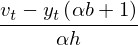

In [25]:
AD #check that it worked 

In [26]:
SRAS #check that it worked

In [27]:
AD1=(1/(par['h']*par['alpha']))*(vt-(yt*(1+par['b']*par['alpha'])))
AD1

In [28]:
SRAS1=pit_1+(par['gamma']*yt)-(par['phi']*par['gamma']*yt_1)+st+(par['phi']*st_1)
SRAS1

The short term equilibrium is defined by aggregate supply (SRAS) equal to aggregate demand (AD). Therefore, we start by setting the two equations equal to each other, and solve for $y_t$ to find the equilibrium output. We will first find the general equilibrium expressions, and then we insert for the given parameter values to find the specific expression: 

**Equilibrium output and inflation (general)**

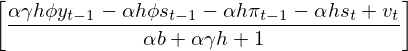

In [29]:
#find output:
AD_SRAS=sm.Eq(AD,SRAS)
ytstar=sm.solve(AD_SRAS, yt)
ytstar

We now want to solve for the equilibrium inflation, by inserting the obtained ystar into the AD-equation 

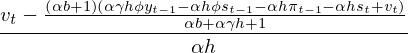

In [30]:
#find inflation 
pitstar = 1/(h*alpha)*(vt-(1+b*alpha)*ytstar[0])
pitstar


**Equilibrium output and inflation (with the given parameter values)**

In [31]:
#find output
AD1_SRAS1=sm.Eq(AD1,SRAS1)
ytstar1=sm.solve(AD1_SRAS1, yt)
ytstar1

In [32]:
#find inflation 
pitstar1 = 1/(par['h']*par['alpha'])*(vt-(1+par['b']*par['alpha'])*ytstar1[0])
pitstar1



We can see that the equilibrium output and inflation depends on inflation in the previous periods and supply- and demand disturbance. 

# Question 2.2

We now want to solve for $y_t$ and $pi_t$ **numerically**.
First, we define the functions:

In [33]:
yt_eq = sm.lambdify((alpha,h,b,phi,gamma,vt,st,pit_1,yt_1,st_1), ytstar[0])

In [34]:
pit_eq = sm.lambdify((alpha,h,b,phi,gamma,vt,st,pit_1,yt_1,st_1), pitstar)

Then use that: 
    
$$y_{t-1} = \pi_{t-1} = v_t = s_t = s_{t-1} = 0$$
$$ \alpha = 5.76 $$
$$ h = 0.5 $$
$$ b = 0.5 $$
$$ \phi = 0 $$
$$ \gamma = 0.075$$


##### using $v_t$ =0

**Output**

In [35]:
yt_eq(par['alpha'], par['h'], par['b'], par['phi'], par['gamma'], 0, 0, 0, 0, 0)

**Inflation**

In [36]:
pit_eq(par['alpha'], par['h'], par['b'], par['phi'], par['gamma'], 0, 0, 0, 0, 0)

Now we want to illustrate the solution **graphically**. We define the AD-and SRAS-curves as functions:

In [37]:
def ADcurve(h, alpha, yt, vt, b):
    return (1/(h*alpha))*(vt-(y*(1+b*alpha)))

def SRAScurve(pit_1, gamma, yt, yt_1, st, phi, st_1):
    return pit_1+(gamma*yt)-(phi*gamma*yt_1)+st+(phi*st_1)

Text(0, 0.5, '$\\pi_t$')

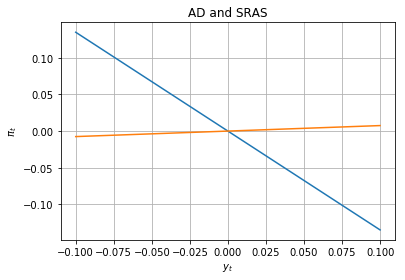

In [38]:
#insert the given values in the funcitons 
y=np.linspace(-0.1,0.1,100)
AD_plot=ADcurve(0.5, 5.76, y, 0, 0.5)
SRAS_plot=SRAScurve(0, 0.075, y, 0, 0, 0, 0)

#create the plot
plt.plot(y,AD_plot,label='AD')
plt.plot(y,SRAS_plot,label='SRAS')
plt.grid(True)

plt.title('AD and SRAS')
plt.xlabel('$y_t$')
plt.ylabel('$\pi_t$')

Graphically, the short term equilibrium is given by the intersection of the AD-curve and the SRAS-curve. 
As seen in the figure, this gives $y_{t} = \pi_{t} $ =0, which is the same as our numerical solution. 

#### Now, we do the same with $v_t$ =0.1

#### Numerically 

In [39]:
#output
yt_eq(par['alpha'], par['h'], par['b'], par['phi'], par['gamma'], 0.1, 0, 0, 0, 0)

In [40]:
#inflation 
pit_eq(par['alpha'], par['h'], par['b'], par['phi'], par['gamma'], 0.1, 0, 0, 0, 0)

**Graphically**

Increasning $v_t$ causes a positive shift in the AD-curve:

Text(0, 0.5, '$\\pi_t$')

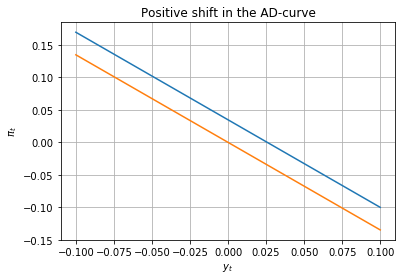

In [41]:
#graph the shift 
AD_plot1=ADcurve(0.5, 5.76, y, 0.1, 0.5)

y = np.linspace(-0.1,0.1,100)
plt.plot(y,AD_plot1,label='AD1')
plt.plot(y,AD_plot,label='AD0')
plt.grid(True)

plt.title('Positive shift in the AD-curve')
plt.xlabel('$y_t$')
plt.ylabel('$\pi_t$')


For a given value of $y_t$, $\pi_t$ is now higher than before the shift. Therefore, in the new equilibrium $y_t$ and $\pi_t $ will we higher: 

Text(0, 0.5, '$\\pi_t$')

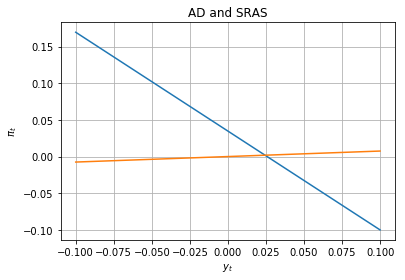

In [42]:
#graph the new equilibrium 
AD_plot1=ADcurve(0.5, 5.76, y, 0.1, 0.5)

y = np.linspace(-0.1,0.1,100)
plt.plot(y,AD_plot1,label='AD0')
plt.plot(y,SRAS_plot,label='SRAS')
plt.grid(True)

plt.title('AD and SRAS')
plt.xlabel('$y_t$')
plt.ylabel('$\pi_t$')

We can see that the graphical solution corresponds to the numerical, with
$y_t$ = 0.0244 and $\pi_t$ = 0.0018

## Question 2.3

Fist, we have to define the AR(1) processes. We do this by creating the functions v_func and s_func

In [43]:
#Define the AR(1) processes
def v_func(vt_1, x):
    return par['delta']*vt_1+x

def s_func(st_1,c):
    return par['omega']*st_1+c

In [44]:
y_lambdified = sm.lambdify((pit_1, st, vt, phi, st_1, yt_1), ytstar1)
pi_lambdified = sm.lambdify((pit_1, st, yt, phi, st_1, yt_1), pitstar1)

We then want to run a simulation with T=50. We create empty vectors for the variables of interest, and fill them by looping through the time range

In [45]:
T=50

#allocate simulation data 
y = [0]
pi = [0]
v = [0]
s = [0]
c = np.zeros(T)
x = np.zeros(T)
x[1] = 0.1 #demand shock 

for t in range(1,T):
    #update z and v
    v.append(v_func(v[t-1], x[t]))
    s.append(s_func(s[t-1], c[t]))
    
    #compute y and pi using yt_eq and pit_eq 
    y.append(yt_eq(par['alpha'], par['h'],par['b'],par['phi'],par['gamma'],v[t],s[t],pi[t-1],y[t-1],s[t-1]))
    pi.append(pit_eq(par['alpha'], par['h'],par['b'],par['phi'],par['gamma'],v[t],s[t],pi[t-1],y[t-1],s[t-1]))


### Plot evolution of output gap over T=50 periods 

Text(0, 0.5, '$y$')

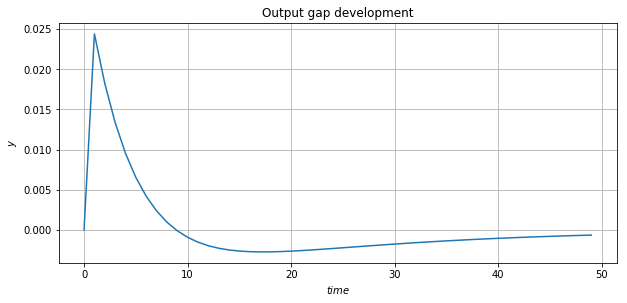

In [473]:
plot = plt.figure(figsize=(10,15))
ax = plot.add_subplot(311)
plt.grid(True)

ax.plot(y,label='$\y$')
ax.set_title('Output gap development')
ax.set_xlabel('$time$')
ax.set_ylabel('$y$')

The spike in the output gap comes from $x_0$ = 0.1. This represents a demand shock, which causes output to increase. The output gap stabalizes over time, due to the fact that $x_t$ =0. 

### Plot evolution of inflation gap over T=50 periods 

Text(0, 0.5, '$\\pi$')

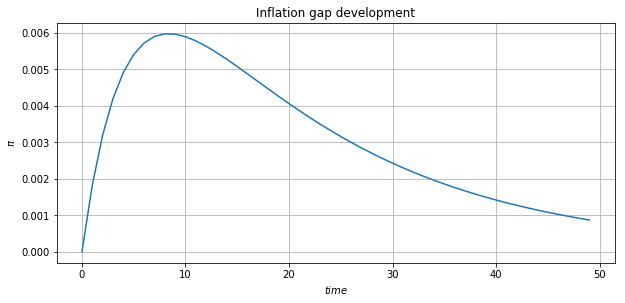

In [474]:
plot = plt.figure(figsize=(10,15))
ax = plot.add_subplot(311)
plt.grid(True)

ax.plot(pi,label='$\pi$')
ax.set_title('Inflation gap development')
ax.set_xlabel('$time$')
ax.set_ylabel('$\pi$')

The interpretation is simlar to the previous. The spike in the inflation gap is caused by the demand shock, $x_0$ =0.1
We can also plot them in the same diagram:

Text(0, 0.5, '$\\pi/y$')

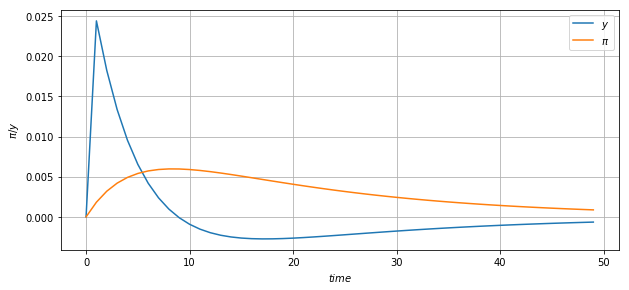

In [475]:
plot = plt.figure(figsize=(10,15))
ax = plot.add_subplot(311)

ax.plot(y,label='$y$')
ax.plot(pi,label='$\pi$')
ax.legend(loc='upper right');
plt.grid(True)


ax.set_xlabel('$time$')
ax.set_ylabel('$\pi/y$')

In the long run, they both converges towards 0.Fluctuations are caused by supply- and demand shocks.

# Question 2.4
### Simulate model

We start by simulate the AS-AD model for 1,000 periods.

In [476]:
#set-up
np.random.seed(12345)   
T=1000

#generate the stochastic shocks 
x1 = np.random.normal(loc=0,scale=par['sigma_x'],size=T)
c1 = np.random.normal(loc=0,scale=par['sigma_c'],size=T)


#allocate simulation data 
y1 = [0]
pi1 = [0]
v1 = [0]
s1 = [0]
x[1] = 0.1 #demand shock 

for t in range(1,T):
    #update z and v
    v1.append(v_func(v1[t-1], x1[t]))
    s1.append(s_func(s1[t-1], c1[t]))
    
    #compute y and pi using yt_eq and pit_eq 
    y1.append(yt_eq(par['alpha'], par['h'],par['b'],par['phi'],par['gamma'],v1[t],s1[t],pi1[t-1],y1[t-1],s1[t-1]))
    pi1.append(pit_eq(par['alpha'], par['h'],par['b'],par['phi'],par['gamma'],v1[t],s1[t],pi1[t-1],y1[t-1],s1[t-1]))


## Plot output gap and inflation development in the same graph

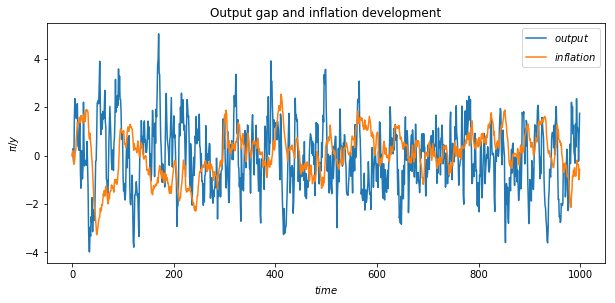

In [477]:
plot = plt.figure(figsize=(10,15))
ax = plot.add_subplot(311)

ax.plot(y1,label='$output$')
ax.plot(pi1,label='$inflation$')

ax.set_title('Output gap and inflation development')
ax.set_xlabel('$time$')
ax.set_ylabel('$\pi/y$')
ax.legend(loc='upper right');

## Calculate statistics 

1.Variance of $y_t$, $var(y_t)$**

In [478]:
y_var=np.var(y1)
y_var

2.Variance of $\pi_t$, $var(\pi_t)$ 

In [479]:
pi_var=np.var(pi1)
pi_var

3.Correlation between $y_t$ and $\pi_t$, $corr(y_t,\pi_t)$

In [480]:
np.corrcoef(y1,pi1)

array([[ 1.        , -0.17556771],
       [-0.17556771,  1.        ]])

4. Auto-correlation between $y_t$ and $y_{t-1}$, $corr(y_t,y_{t-1})$.

In [481]:
#Define a function for autocorrelation 
def autocorr(x, t=1):
    return np.corrcoef(np.array([x[:-t], x[t:]]))

#find the autocorrelation of yt and yt-1
autocorr(y1)

array([[1.        , 0.78020678],
       [0.78020678, 1.        ]])

5. Auto-correlation between $\pi_t$ and $\pi_{t-1}$, $corr(\pi_t,\pi_{t-1})$

In [482]:
autocorr(pi1)

array([[1.       , 0.9720786],
       [0.9720786, 1.       ]])

In [483]:
print(f'Variance of y is, {y_var:.2}')
print(f'Variance of pi is, {pi_var:.2}')
print(f'Correlation between y and pi is, {np.corrcoef(y1,pi1)[0,1]:.2}')
print(f'Autocorrelation in pi is, {autocorr(y1)[0,1]:.2}')
print(f'Autocorrelation in y is, {autocorr(pi1)[0,1]:.2}')

Variance of y is, 1.9
Variance of pi is, 0.86
Correlation between y and pi is, -0.18
Autocorrelation in pi is, 0.78
Autocorrelation in y is, 0.97


# Question 2.5 

**Note**: parts of this solution is inspired by dsd and chh jmk

We want to define a function which returns the correlation between output and inflation. We define the function to take $ \phi $ (phi) as an input, such that we can loop over different values of $ \phi $

In [490]:
def corr_func(phi):
    #set intitial values
    y = [0]
    pi = [0]
    v = [0]
    s = [0]
    s_1=[0]
    corr = []

    #define phi to be between 0 and 1
    phi_values = np.linspace(0,1,100)

    #loop over different values of phi
    for phi in phi_values:
    
        np.random.seed(12345)
    
        # define supply and demand shocks:
        s_x = np.random.normal(loc=0,scale=par['sigma_x'],size=1000)
        s_c = np.random.normal(loc=0,scale=par['sigma_c'],size=1000)

        #update shock-variables
        for x in s_x:
            v.append(par['delta']*v[-1] + x)

        for c in s_c:
            s.append(par['omega']*s[-1] + c)


        #update s_1, v and s
        s_1 = s[:-1] 
        v = v[1:]
        s = s[1:]

        #zip the three vectors
        zip_= list(zip(v,s,s_1))

        #use the equilibrium equations defined in 2.2 to find output and inflation values:
       
        for a,b,c in zip_:
            y_upd =yt_eq(par['alpha'],par['h'],par['b'],phi,par['gamma'],a,b,pi[-1],y[-1],c)
            pi_upd=pit_eq(par['alpha'],par['h'],par['b'],phi,par['gamma'],a,b,pi[-1],y[-1],c)
     
            y.append(y_upd)
            pi.append(pi_upd)


        y = y[1:]
        pi = pi[1:]

        # find correlation between y and pi
        corr_y_pi = np.corrcoef(y,pi)[0,1]
        corr.append(corr_y_pi)

        # Here we reset the initial values:

        y = [0]
        pi = [0]
        v = [0]
        s = [0]
        
    return corr[0]

Now, we can insert for different values of $ \phi $ in the corr-function, to obtain the correlation coefficient. To check that it works, we can test the function for $ \phi = 0 $ and see if we get the same correlation coefficient as in 2.4

In [492]:
corr_func(0)

This is the same as in 2.4

Now, we want to plot the correlation between $y$ and $\pi$ for different values of $ \phi $

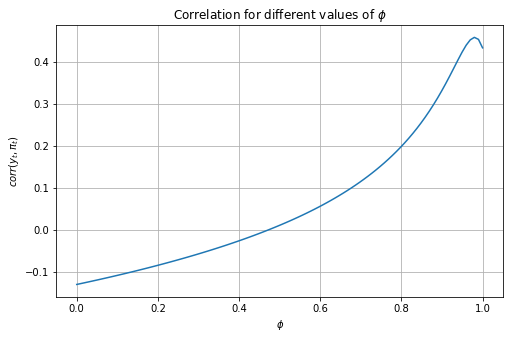

In [494]:
fig=plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(phi_values,corr)
ax.grid() 
ax.set_xlabel('$\phi$')
ax.set_ylabel('$corr(y_t,\pi_t)$') 
ax.set_title('Correlation for different values of $\phi$'); 

We can create a function which squares the difference between our correlation function (corr) and the desired value (0.31), and then we use a numerical optimizer to minimize the squared distance

In [495]:
#define the function 
obj = lambda phi: (corr_func(phi)-0.31)**2

# use scipy optimize
solution=optimize.minimize_scalar(obj,0, method='bounded',bounds=(0,1))
solution 



     fun: 0.23655945306149767
 message: 'Solution found.'
    nfev: 25
  status: 0
 success: True
       x: 0.9999940391390134

$Corr(y_t, \pi_t)$ is equal to 0.31 when $\phi$=1


# Question 2.6

We use the same procedure as in 2.5, but we now define new function "statistics", which also takes sigma_x and sigma_c as inputs. We also let the function return all the wanted statistics (variances, correlation and autocorrelations), instead of just correlation as in 2.5. 

In [496]:
def statistics(phi_us, sigma_x_us, sigma_c_us):

    #set intitial values
    y = [0]
    pi = [0]
    v = [0]
    s = [0]
    s_1=[0]
    corr = []

    #define phi to be between 0 and 1
    phi_values = np.linspace(0,1,100)

    #loop over different values of phi
    for phi_us in phi_values:
    
        np.random.seed(12345)
    
        # define supply and demand shocks:
        s_x = np.random.normal(loc=0,scale=sigma_x_us,size=1000)
        s_c = np.random.normal(loc=0,scale=sigma_c_us,size=1000)

        #update shock-variables
        for x in s_x:
            v.append(par['delta']*v[-1] + x)

        for c in s_c:
            s.append(par['omega']*s[-1] + c)


        #update s_1, v and s
        s_1 = s[:-1] 
        v = v[1:]
        s = s[1:]

        #zip the tree vectors
        zip_= list(zip(v,s,s_1))

        #use the equilibrium equations defined in 2.2 to find output and inflation values 
        for i,x,p in zip_:
            y_upd =yt_eq(par['alpha'],par['h'],par['b'],phi_us,par['gamma'],i,x,pi[-1],y[-1],p)
            pi_upd=pit_eq(par['alpha'],par['h'],par['b'],phi_us,par['gamma'],i,x,pi[-1],y[-1],p)
     
            y.append(y_upd)
            pi.append(pi_upd)


        y = y[1:]
        pi = pi[1:]

        # find correlation between y and pi
        corr_y_pi = np.corrcoef(y,pi)[0,1]
        corr.append(corr_y_pi)
        
        
        #define the different statistics 
        var_y = np.var(y)
        var_pi = np.var(pi)
        corr_y_pi = np.corrcoef(y,pi)[0,1]
        autocorr_y = np.corrcoef(y[:-1],y[1:])[1,0]
        autocorr_pi= np.corrcoef(pi[:-1],pi[1:])[1,0]
        return [var_y, var_pi, corr_y_pi, autocorr_y, autocorr_pi]
   

Once again, we can check that the code work by test the function for $ \phi = 0 $ and see if we get the same correlation coefficient as in 2.4

In [497]:
statistics(0, par['sigma_x'], par['sigma_c'])

Which is the same as we found in 2.4. Therefore, we know that the function is working. 

Now, we create a vector with the desired US-statistics:

In [499]:
US_statistics=np.array([1.64, 0.21, 0.31, 0.84, 0.48])

Define an intitial guess, x0, which we set equal to the values obtained 2.5. We also define a vector of the parameters (in order to use it in the lambda function) and set their respective bounds:

In [500]:
#initial guess:
x0=np.array([1,3.492, 0.2])

#vector
parameters=[phi, sigma_x, sigma_c]

#define phi to be between 0 and 1, and the shock variables between 0 and 10
bounds=[[0,1],[0,10],[0,10]] 

Now, we define the objective function, and solve it with a numerical optimizer (scripy)

In [501]:
#define objective
obj_2= lambda parameters: np.sum((statistics(parameters[0], parameters[1], parameters[2]) - US_statistics)**2)

# use scipy optimize
solution_2=optimize.minimize(obj_2,x0, bounds=bounds)
solution_2

      fun: 0.39886456683595756
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.00000000e+00, -2.05391260e-07, -5.93969318e-07])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 36
      nit: 8
   status: 0
  success: True
        x: array([1.        , 3.39390972, 0.01830073])

This gives ut the optimal parameters of phi, sigma_x and sigma_c:

In [503]:
print('The optimal value of phi is: '+ str(round(solution_2.x[0],3)))
print('The optimal value of sigma_x '+ str(round(solution_2.x[1],3)))
print('The optimal value of sigma_c:'+ str(round(solution_2.x[2],3)))


The optimal value of phi is: 1.0
The optimal value of sigma_x 3.394
The optimal value of sigma_c:0.018


We now want to run the simulation with these obtained values to get the variances of $y$ and $\pi $, the correlation between $y$ and $\pi $ and the autocorrelations of $y$ and $\pi $


In [504]:
#assign values
phi_sol=solution_2.x[0]
sigma_x_sol=solution_2.x[1]
sigma_c_sol=solution_2.x[2]

In [505]:
#run simulation
sim_sol=statistics(phi_sol,sigma_x_sol, sigma_c_sol)
sim_sol

In [506]:
print('The variance of y is: ' + str(round(sim_sol[0],2)))
print('The cariance of pi is: ' + str(round(sim_sol[1],2)))
print('The correlation between y and pi is: ' + str(round(sim_sol[2],2)))
print('The autocorrelation of y is: ' + str(round(sim_sol[3],2)))
print('The autocorrelation of pi is: ' + str(round(sim_sol[4],2)))

The variance of y is: 1.56
The cariance of pi is: 0.47
The correlation between y and pi is: 0.07
The autocorrelation of y is: 0.75
The autocorrelation of pi is: 0.99


#### Our solution:

1. $var(y_t) = 1.56$
2. $var(\pi_t) = 0.47$
3. $corr(y_t,\pi_t) = 0.07$
4. $corr(y_t,y_{t-1}) = 0.75$
5. $corr(\pi_t,\pi_{t-1}) = 0.99$

#### Desired solution:

1. $var(y_t) = 1.64$
2. $var(\pi_t) = 0.21$
3. $corr(y_t,\pi_t) = 0.31$
4. $corr(y_t,y_{t-1}) = 0.84$
5. $corr(\pi_t,\pi_{t-1}) = 0.48$

This is as close as we get with this approach. 

# 3. Exchange economy

Consider an **exchange economy** with

1. 3 goods, $(x_1,x_2,x_3)$
2. $N$ consumers indexed by \\( j \in \{1,2,\dots,N\} \\)
3. Preferences are Cobb-Douglas with log-normally distributed coefficients

    $$ \begin{eqnarray*}
    u^{j}(x_{1},x_{2},x_{3}) &=& 
    \left(x_{1}^{\beta_{1}^{j}}x_{2}^{\beta_{2}^{j}}x_{3}^{\beta_{3}^{j}}\right)^{\gamma}\\
     &  & \,\,\,\beta_{i}^{j}=\frac{\alpha_{i}^{j}}{\alpha_{1}^{j}+\alpha_{2}^{j}+\alpha_{3}^{j}} \\
     &  & \,\,\,\boldsymbol{\alpha}^{j}=(\alpha_{1}^{j},\alpha_{2}^{j},\alpha_{3}^{j}) \\ 
     &  & \,\,\,\log(\boldsymbol{\alpha}^j) \sim \mathcal{N}(\mu,\Sigma) \\
    \end{eqnarray*} $$

4. Endowments are exponentially distributed,

$$
\begin{eqnarray*}
\boldsymbol{e}^{j} &=& (e_{1}^{j},e_{2}^{j},e_{3}^{j}) \\
 &  & e_i^j \sim f, f(z;\zeta) =  1/\zeta \exp(-z/\zeta)
\end{eqnarray*}
$$

Let $p_3 = 1$ be the **numeraire**. The implied **demand functions** are:

$$
\begin{eqnarray*}
x_{i}^{\star j}(p_{1},p_{2},\boldsymbol{e}^{j})&=&\beta^{j}_i\frac{I^j}{p_{i}} \\
\end{eqnarray*}
$$

where consumer $j$'s income is

$$I^j = p_1 e_1^j + p_2 e_2^j +p_3 e_3^j$$

The **parameters** and **random preferences and endowments** are given by:

In [46]:
# a. parameters
N = 50000
mu = np.array([3,2,1])
Sigma = np.array([[0.25, 0, 0], [0, 0.25, 0], [0, 0, 0.25]])
gamma = 0.8
zeta = 1

# b. random draws
seed = 1986
np.random.seed(seed)

# preferences
alphas = np.exp(np.random.multivariate_normal(mu, Sigma, size=N))
betas = alphas/np.reshape(np.sum(alphas,axis=1),(N,1))

# endowments
e1 = np.random.exponential(zeta,size=N)
e2 = np.random.exponential(zeta,size=N)
e3 = np.random.exponential(zeta,size=N)

**Question 1:** Plot the histograms of the budget shares for each good across agents.

Consider the **excess demand functions:**

$$ z_i(p_1,p_2) = \sum_{j=1}^N x_{i}^{\star j}(p_{1},p_{2},\boldsymbol{e}^{j}) - e_i^j$$

**Question 2:** Plot the excess demand functions.

**Quesiton 3:** Find the Walras-equilibrium prices, $(p_1,p_2)$, where both excess demands are (approximately) zero, e.g. by using the following tâtonnement process:

1. Guess on $p_1 > 0$, $p_2 > 0$ and choose tolerance $\epsilon > 0$ and adjustment aggressivity parameter, $\kappa > 0$.
2. Calculate $z_1(p_1,p_2)$ and $z_2(p_1,p_2)$.
3. If $|z_1| < \epsilon$ and $|z_2| < \epsilon$ then stop.
4. Else set $p_1 = p_1 + \kappa \frac{z_1}{N}$ and $p_2 = p_2 + \kappa \frac{z_2}{N}$ and return to step 2.

**Question 4:** Plot the distribution of utility in the Walras-equilibrium and calculate its mean and variance.

**Question 5:** Find the Walras-equilibrium prices if instead all endowments were distributed equally. Discuss the implied changes in the distribution of utility. Does the value of $\gamma$ play a role for your conclusions?

**The answer to this question is mostly based on Lecture 2, 3, 4, 10 and Problem Set 2.**


# Question 1.1: Plot the histograms of the budget shares for each good across agents.

Inserting the income function into the implied demand function:

$$
\begin{eqnarray*}
x_{i}^{\star j}(p_{1},p_{2},\boldsymbol{e}^{j})&=&\beta^{j}_i\frac{I^j}{p_{i}}&=&\beta^{j}_i\frac{p_1 e_1^j + p_2 e_2^j +e_3^j}{p_{i}}\\
\end{eqnarray*}
$$

The equilibrium is a set of prices \\( p_1 \\), \\( p_2 \\) and \\(p_3\\) = 1 (numeraire good) satifying:


\\[ 
\begin{eqnarray*}
x_1(p_1,p_2) = \sum_{j=1}^N x_{1}^{\star j}(p_{1},p_{2},e^{j}) &=& \sum_{j=1}^N \beta_1^j \frac{p_1 e_1^j + p_2 e_2^j+ e_3^j}{p_1}\\
x_2(p_1,p_2) = \sum_{j=1}^N x_{2}^{\star j}(p_{1},p_{2},e^{j}) &=& \sum_{j=1}^N \beta_2^j \frac{p_1 e_1^j + p_2 e_2^j+ e_3^j}{p_2}\\
x_3(p_1,p_2) = \sum_{j=1}^N x_{3}^{\star j}(p_{1},p_{2},e^{j}) &=& \sum_{j=1}^N \beta_3^j (p_1 e_1^j + p_2 e_2^j+ e_3^j)
\end{eqnarray*}
\\]


Rearrainging the implied demand function to:
$$
\begin{eqnarray*}
x_{i}^{\star j}(p_{1},p_{2},\boldsymbol{e}^{j})&=&\beta^{j}_i\frac{I^j}{p_{i}} \\
\end{eqnarray*}
$$

$$
\begin{eqnarray*}
x_{i}^{\star j} p_{i} &=& \beta_i^j I^j \\
\end{eqnarray*}
$$

shows that $\beta$ is the fraction of consumer j's income share for good i. 

In [47]:
print(betas) #gives us an idea of the betas for all 50000 consumers

[[0.53104511 0.30693723 0.16201766]
 [0.50866997 0.4162364  0.07509363]
 [0.83317207 0.07722226 0.08960567]
 ...
 [0.63725404 0.22027742 0.14246854]
 [0.78205036 0.11988119 0.09806844]
 [0.65552751 0.24728801 0.09718448]]


In [48]:
type(betas)

numpy.ndarray

In [49]:
#extracting the first, second and third column of the betas goves us the betas for the respective good 1, 2 and 3
beta1 = betas[:,0]
beta2 = betas[:,1]
beta3 = betas[:,2]
print(beta1) #to check

[0.53104511 0.50866997 0.83317207 ... 0.63725404 0.78205036 0.65552751]


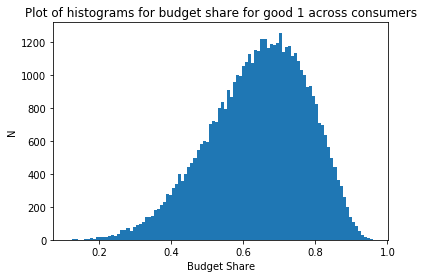

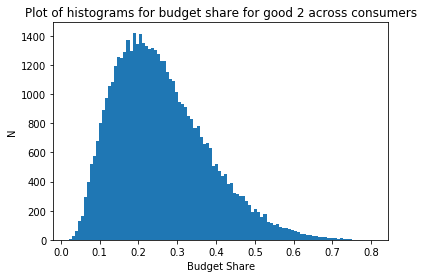

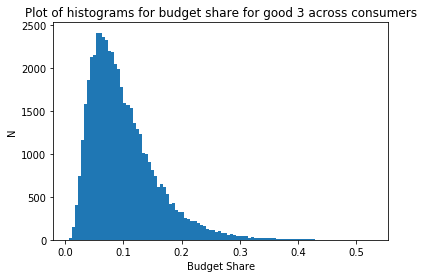

In [50]:
# Histograms

plt.hist(beta1, bins=100) #100 bins means grouping into 100 sections between 0 and 1
plt.title("Plot of histograms for budget share for good 1 across consumers")
plt.xlabel("Budget Share")
plt.ylabel("N")
plt.show()

plt.hist(beta2, bins=100) #100 bins means grouping into 100 sections between 0 and 1
plt.title("Plot of histograms for budget share for good 2 across consumers")
plt.xlabel("Budget Share")
plt.ylabel("N")
plt.show()

plt.hist(beta3, bins=100) #100 bins means grouping into 100 sections between 0 and 1
plt.title("Plot of histograms for budget share for good 3 across consumers")
plt.xlabel("Budget Share")
plt.ylabel("N")
plt.show()

Consider the **excess demand functions:**

$$ z_i(p_1,p_2) = \sum_{j=1}^N x_{i}^{\star j}(p_{1},p_{2},\boldsymbol{e}^{j}) - e_i^j$$


# Question 3.2: Plot the excess demand functions.

$$ z_i(p_1,p_2) = \sum_{j=1}^N x_{i}^{\star j}(p_{1},p_{2},\boldsymbol{e}^{j}) - e_i^j = 0 $$

If the excess demand equals 0, Walras's law is fulfilled.

But first, we define the demand for each good's market dependent on \\(p_1\\) and \\(p_2\\).

In [51]:
p3 = 1 #define the price of the numeraire good

def demand1_EE(betas,p1,p2,e1,e2,e3):
    I = p1*e1 + p2*e2 + e3
    return beta1*(I/p1)

def demand2_EE(betas,p1,p2,e1,e2,e3):
    I = p1*e1 + p2*e2 + e3
    return beta2*(I/p2)

def demand3_EE(betas,p1,p2,e1,e2,e3):
    I = p1*e1 + p2*e2 + e3
    return beta3*(I/p3)

Walras's law constitutes that if all other markets are in an equilibrium, the last one has to be, too. Therefore, solving 2 markets should result in the 3rd one not having any excess demand.

In [52]:
#defining the excess demand functions for all goods
def excess_demand1_EE(betas,p1,p2,e1,e2,e3):
    
    demand_EE = np.sum(demand1_EE(betas,p1,p2,e1,e2,e3))
    
    supply_EE = np.sum(e1)
    
    excess_demand_EE = demand_EE - supply_EE
    
    return excess_demand_EE

def excess_demand2_EE(betas,p1,p2,e1,e2,e3):
    
    demand_EE = np.sum(demand2_EE(betas,p1,p2,e1,e2,e3))
    
    supply_EE = np.sum(e2)
    
    excess_demand_EE = demand_EE - supply_EE
    
    return excess_demand_EE

def excess_demand3_EE(betas,p1,p2,e1,e2,e3):
    
    demand_EE = np.sum(demand3_EE(betas,p1,p2,e1,e2,e3))
    
    supply_EE = np.sum(e3)
    
    excess_demand_EE = demand_EE - supply_EE
    
    return excess_demand3_EE

Since \\(p_3 = 1\\) is set, we have \\(p_1\\) and \\(p_2\\) as the variables on the x and y axis of the 3D graph. The z axsis represents the excess demand for the respective.

In [53]:
#create the vectors / grids
p1_vec = np.linspace(1,10,100) #create a linear vector in the interval [1,10] with 100 evenly spaced points
p2_vec = np.linspace(1,10,100)

#we need empty grids for the excess demand 1 and 2
e_demand1_grid_EE = np.empty((100,100))
e_demand2_grid_EE = np.empty((100,100))
p1_grid,p2_grid = np.meshgrid(p1_vec,p2_vec,indexing='ij')

for i,p1 in enumerate(p1_vec): # for loop in order to createthe excess demand in terms of the two price vectors
    for j,p2 in enumerate(p2_vec):
        e_demand1_grid_EE[i,j] = excess_demand1_EE(betas,p1,p2,e1,e2,e3)
        e_demand2_grid_EE[i,j] = excess_demand2_EE(betas,p1,p2,e1,e2,e3)

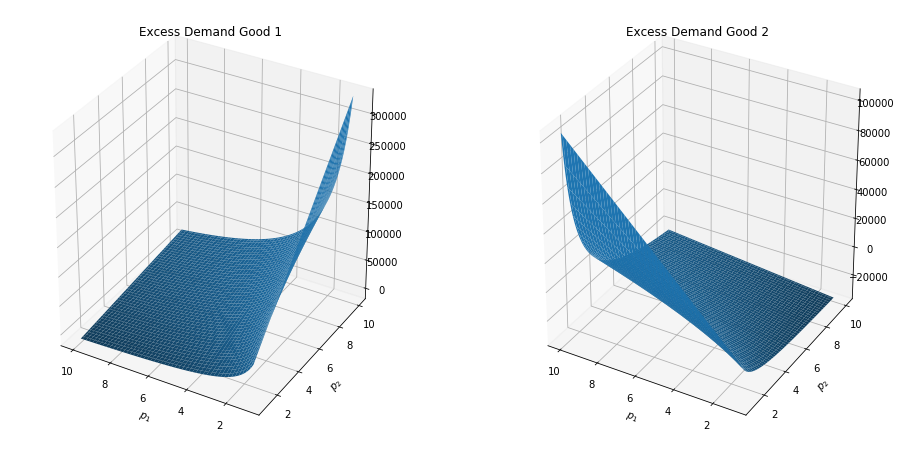

In [54]:
# Figure
fig = plt.figure(figsize=(16,8))

ax1 = fig.add_subplot(121, projection='3d')
fig1 = ax1.plot_surface(p1_grid,p2_grid,e_demand1_grid_EE)
ax1.invert_xaxis()
ax1.set_title('Excess Demand Good 1')
ax1.set_xlabel('$p_1$')
ax1.set_ylabel('$p_2$')

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(p1_grid,p2_grid,e_demand2_grid_EE)
ax2.invert_xaxis()
ax2.set_title('Excess Demand Good 2')
ax2.set_xlabel('$p_1$')
ax2.set_ylabel('$p_2$') 

plt.show() 

# Quesiton 3.3: Find the Walras-equilibrium prices, $(p_1,p_2)$, where both excess demands are (approximately) zero, e.g. by using the following tâtonnement process:

1. Guess on $p_1 > 0$, $p_2 > 0$ and choose tolerance $\epsilon > 0$ and adjustment aggressivity parameter, $\kappa > 0$.
2. Calculate $z_1(p_1,p_2)$ and $z_2(p_1,p_2)$.
3. If $|z_1| < \epsilon$ and $|z_2| < \epsilon$ then stop.
4. Else set $p_1 = p_1 + \kappa \frac{z_1}{N}$ and $p_2 = p_2 + \kappa \frac{z_2}{N}$ and return to step 2.

In [55]:
#step 1: Guess on p1 and p2, tolerance epsilon and adjustment parameter kappa
p1 = 0.5
p2 = 0.5
kappa = 0.8
eps = 1e-8


def equilibrium_EE(betas,p1,p2,e1,e2,e3,kappa=0.8,eps=1e-8,maxiter=10000):
    
    t = 0
    while True:

        #step 2: Define the equilibrium function incl. the excess demand functions for good 1 and 2
        Z1 = excess_demand1_EE(betas,p1,p2,e1,e2,e3)
        Z2 = excess_demand2_EE(betas,p1,p2,e1,e2,e3)

        
        #step 3: define whether to stop or not
        if  np.abs(Z1) < eps or np.abs(Z2) < eps or t >= maxiter:
            print(f'{t:3d}: p1 = {p1:12.8f} -> excess demand -> {Z1:14.8f}')
            print(f'{t:3d}: p2 = {p2:12.8f} -> excess demand -> {Z2:14.8f}')
            break    
    
        # step 4: change p's if not stopping
        p1 = p1 + kappa*Z1/N
        p2 = p2 + kappa*Z2/N
            
        
        if t < 5 or t%1000 == 0:
            print(f'{t:3d}: p1 = {p1:12.8f} -> excess demand -> {Z1:14.8f}')
            print(f'{t:3d}: p2 = {p1:12.8f} -> excess demand -> {Z2:14.8f}')
        elif t == 5:
            print('   ...')
            
        
        t += 1

    return p1, p2

In [56]:
# call the equilibrium function
p1, p2 = equilibrium_EE(betas,p1,p2,e1,e2,e3,kappa=kappa,eps=eps)

  0: p1 =   1.75618758 -> excess demand -> 78511.72403675
  0: p2 =   1.75618758 -> excess demand ->  1976.77594850
  1: p1 =   1.91889553 -> excess demand -> 10169.24631720
  1: p2 =   1.91889553 -> excess demand -> 30068.91485501
  2: p1 =   2.17170082 -> excess demand -> 15800.33081485
  2: p2 =   2.17170082 -> excess demand ->   331.86779583
  3: p1 =   2.36310422 -> excess demand -> 11962.71228988
  3: p2 =   2.36310422 -> excess demand ->  3333.01765190
  4: p1 =   2.52741831 -> excess demand -> 10269.63063665
  4: p2 =   2.52741831 -> excess demand ->  3630.14563580
   ...
1000: p1 =   6.49005422 -> excess demand ->     0.00085602
1000: p2 =   6.49005422 -> excess demand ->     0.00031934
1705: p1 =   6.49005515 -> excess demand ->     0.00000003
1705: p2 =   2.61669400 -> excess demand ->     0.00000001


In [57]:
#Check whether excess demand is actually close to zero
Z1 = excess_demand1_EE(betas,p1,p2,e1,e2,e3)
Z2 = excess_demand2_EE(betas,p1,p2,e1,e2,e3)
print(Z1,Z2)

2.6746420189738274e-08 9.975337889045477e-09


In [58]:
#the equilibrium prices are
p1, p2

In [59]:
p1_old = p1
p2_old = p2

# Question 4: Plot the distribution of utility in the Walras-equilibrium and calculate its mean and variance.


(Additional orientation Exercise 1)


In [60]:
#defining the utility function
def utlity_func_EE(beta1,beta2,beta3,p1,p2,e1,e2,e3,gamma):
    I = p1*e1 + p2*e2 + e3
    return (((beta1*(I/p1))**beta1)*((beta2*(I/p2))**beta2)*((beta3*I)**beta3))**gamma

In [61]:
#defining the utility vector - except endowments all known
utility_vec_EE = utlity_func_EE(beta1,beta2,beta3,p1,p2,e1,e2,e3,gamma)

print(utility_vec_EE)

[0.39804894 0.94209408 1.84280866 ... 0.9075745  1.07227294 1.34035517]


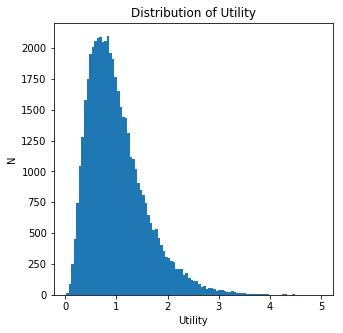

In [74]:
#plotting the distribution of utility as histogram (visualising the distribution)
fig_distr_utility = plt.figure(figsize=(5,5))

plt.hist(utility_vec_EE, bins=100) #100 bins means grouping into 100 sections between 0 and 1
plt.title("Distribution of Utility")
plt.xlabel("Utility")
plt.ylabel("N") # N refers to the number of consumers
plt.show()

In [63]:
#mean
mean = np.mean(utility_vec_EE)

#variance
var = np.var(utility_vec_EE)

mean, var

# Question 5: Find the Walras-equilibrium prices if instead all endowments were distributed equally. Discuss the implied changes in the distribution of utility. Does the value of $\gamma$ play a role for your conclusions?

In [64]:
#define the endowments as equally distributed

e1 = np.random.uniform(zeta,size=N)
e2 = np.random.uniform(zeta,size=N)
e3 = np.random.uniform(zeta,size=N)

In [65]:
"""Redo all the steps as previously when calculating the Walras Equilibrium"""

#step 1: Guess on p1 and p2, tolerance epsilon and adjustment parameter kappa
p1 = 0.5
p2 = 0.5
kappa = 0.8
eps = 1e-8


def equilibrium2_EE(betas,p1,p2,e1,e2,e3,kappa=0.8,eps=1e-8,maxiter=10000):
    
    t = 0
    while True:

        #step 2: Define the equilibrium function incl. the excess demand functions for good 1 and 2
        Z1 = excess_demand1_EE(betas,p1,p2,e1,e2,e3)
        Z2 = excess_demand2_EE(betas,p1,p2,e1,e2,e3)

        
        #step 3: define whether to stop or not
        if  np.abs(Z1) < eps or np.abs(Z2) < eps or t >= maxiter:
            print(f'{t:3d}: p1 = {p1:12.8f} -> excess demand -> {Z1:14.8f}')
            print(f'{t:3d}: p2 = {p2:12.8f} -> excess demand -> {Z2:14.8f}')
            break    
    
        # step 4: change p's if not stopping
        p1 = p1 + kappa*Z1/N
        p2 = p2 + kappa*Z2/N
            
        
        if t < 5 or t%1000 == 0:
            print(f'{t:3d}: p1 = {p1:12.8f} -> excess demand -> {Z1:14.8f}')
            print(f'{t:3d}: p2 = {p1:12.8f} -> excess demand -> {Z2:14.8f}')
        elif t == 5:
            print('   ...')
            
        
        t += 1

    return p1, p2

In [66]:
# call find equilibrium function

p1, p2 = equilibrium_EE(betas,p1,p2,e1,e2,e3,kappa=kappa,eps=eps)


  0: p1 =   1.75530416 -> excess demand -> 78456.50975081
  0: p2 =   1.75530416 -> excess demand ->  1619.49434941
  1: p1 =   1.91580678 -> excess demand -> 10031.41422554
  1: p2 =   1.91580678 -> excess demand -> 30514.77399013
  2: p1 =   2.16983440 -> excess demand -> 15876.72579924
  2: p2 =   2.16983440 -> excess demand ->     8.04497900
  3: p1 =   2.36064982 -> excess demand -> 11925.96413845
  3: p2 =   2.36064982 -> excess demand ->  3235.38650474
  4: p1 =   2.52417695 -> excess demand -> 10220.44540570
  4: p2 =   2.52417695 -> excess demand ->  3586.86588124
   ...
1000: p1 =   6.44732586 -> excess demand ->     0.00073970
1000: p2 =   6.44732586 -> excess demand ->     0.00027504
1688: p1 =   6.44732665 -> excess demand ->     0.00000003
1688: p2 =   2.59082037 -> excess demand ->     0.00000001


In [67]:
p1, p1_old, p2, p2_old

The prices for the goods with uniformaly distributed endowments are minimally lower thanwith exponentially distributed endowments.

In [68]:
Z1, Z2 #just to check

Since the excess demand functions are close to zero, the result is credible.

**Plotting the distribution of utility:**

In [69]:
#vector of utility dependent on endowments
utility_vec2_EE = utlity_func_EE(beta1,beta2,beta3,p1,p2,e1,e2,e3,gamma)

print(utility_vec2_EE)

[1.0251062  1.04838704 1.09560015 ... 1.0088854  1.04959874 1.00031624]


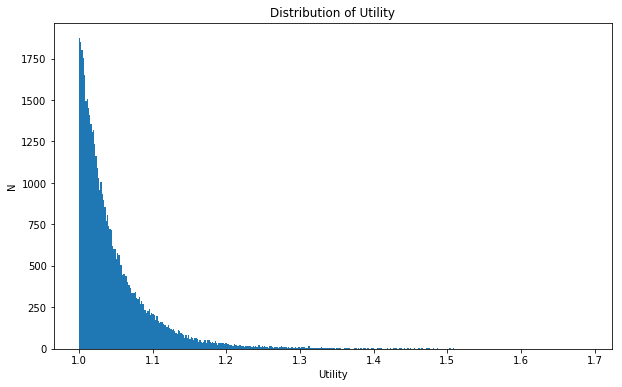

In [73]:
fig_distr_utility2 = plt.figure(figsize=(10,6))

plt.hist(utility_vec2_EE, bins=400) #400 bins means grouping into 400 sections between 0 and 1
plt.title("Distribution of Utility")
plt.xlabel("Utility")
plt.ylabel("N")
plt.show()


In [71]:
mean_new = np.mean(utility_vec2_EE)

#variance
var_new = np.var(utility_vec2_EE)

mean, mean_new, var, var_new

The new utility function has a higher mean and a lot lower variance than before.
Now: does the value of \\(\gamma\\) play a role?
We conduct two new calculations with a different value for gamma.

In [72]:
#new value for gamma
gamma = 0.2

utility_vec_new_EE = utlity_func_EE(beta1,beta2,beta3,p1_old,p2_old,e1,e2,e3,gamma)
utility_vec2_new_EE = utlity_func_EE(beta1,beta2,beta3,p1,p2,e1,e2,e3,gamma)

#calculating the new means
mean_newgamma = np.mean(utility_vec_new_EE) #mean for the original endowments with new gamma

mean_new_newgamma = np.mean(utility_vec2_new_EE) #mean for the equally distributed endowments with new gamma

mean, mean_newgamma, mean_new, mean_new_newgamma

When inserting different values for gamma, it can be seen that the mean for the original function with exponentially distributed endowments changes a bit and the mean for the utility with uniformly distributed endowments changes more. Therfore, we can conclude that the value of gamma plays a role in the conclusion.

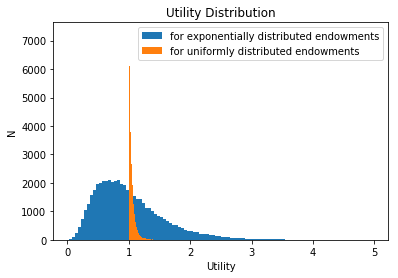

In [79]:
#new
plt.hist(utility_vec_EE, 100, label='for exponentially distributed endowments')
plt.hist(utility_vec2_EE, 100, label='for uniformly distributed endowments')
plt.xlabel('Utility')
plt.ylabel('N')
plt.title('Utility Distribution')
plt.legend()